<a href="https://colab.research.google.com/github/MunySafitri/Pengolahan-Citra-Digital/blob/main/image_processing_number_recognizing%2BModel_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [104]:
print(mnist.load_data())
#Returns
# Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test)
# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

# y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

# y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [105]:
(X_train, y_train), (X_test, y_test)  = mnist.load_data() #data set angka

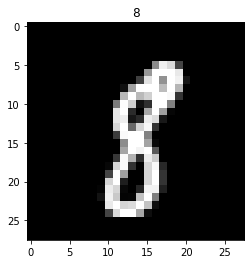

In [106]:
plt.imshow(X_train[300], cmap='gray')
plt.title(y_train[300])
plt.show()

In [107]:
X_train.shape
   #This is a dataset of 60,000 28x28 grayscale images of the 10 digits(total class),
    # along with a test set of 10,000 images.

(60000, 28, 28)

In [108]:
# The length of the dimension set to -1 is automatically determined by inferring from the specified values of other dimensions. This is useful when converting a large array shape.
X_train = X_train.reshape(-1,28,28,1)#(2D)28*28 satu kolom
X_test = X_test.reshape(-1,28,28,1)

In [109]:
X_train =X_train.reshape((-1,28,28,1))#tadi 3 dimensi, harus diubah ke 4 dimensi supaya bisa  di fit()

In [110]:
print(X_train)#numpy.ravel() == numpy.reshape(-1)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [111]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
# Dense layers are used when association can exist among any feature to any other feature in data point. Since between two layers of size n1 and n2, there can n1∗n2 connections and these are referred to as Dense.

from keras.models import Sequential

[link informasi mengenai library diatas](https://datascience.stackexchange.com/questions/44124/when-to-use-dense-conv1-2d-dropout-flatten-and-all-the-other-layers)

In [112]:
model = Sequential()

In [113]:
#bangun model dengan objek sequential
model.add(Conv2D(filters= 4, kernel_size = (5,5) ,activation='relu', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters= 4, kernel_size =(7,7) ,activation='relu', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 10, activation='softmax'))
# It's the most basic layer in neural networks.
# A Dense(10) has ten neurons. A Dense(512) has 512 neurons.




[link lib Dense](https://stackoverflow.com/questions/43755293/what-does-dense-do)

In [114]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics=['acc']) #wajib compile sebelium di fit, acc= accuracy

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_10 (Avera  (None, 12, 12, 4)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_11 (Avera  (None, 3, 3, 4)          0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 36)                0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [116]:
print(model)

In [117]:
model.fit(X_train, y_train, epochs =1 , batch_size = 1) #epoch atau iterasi
# model.fit(x=None, y=None, batch_size=None, epochs=1),
# x: Input data. It could be:


# A Numpy array (or array-like), or a list of arrays
# (in case the model has multiple inputs).

# A TensorFlow tensor, or a list of tensors
# (in case the model has multiple inputs).

60000/60000 [==============================] - 194s 3ms/step - loss: 0.3365 - acc: 0.9011


In [118]:
test = X_test[0].reshape(-1,28,28,1)

In [124]:
print( X_test[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [125]:
print(test)

[[[[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [

In [121]:
#@title Default title text
# model.predict_classes(test)
predict_x=model.predict(test) 
classes_x=np.argmax(predict_x,axis=1)

In [123]:
print(predict_x)

[[1.8881498e-10 2.0791935e-09 3.3175360e-07 2.8759700e-08 2.6622407e-10
  2.5937310e-12 3.3584134e-16 9.9999762e-01 1.1725756e-10 2.0329273e-06]]


In [126]:
print(classes_x)

[7]
